In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# IMPORTANDO OS DADOS

df = pd.read_csv('UL.csv')
print(df)


           Date       Open       High        Low      Close  Adj Close  \
0    2023-02-13  50.919998  51.919998  50.869999  51.889999  50.047417   
1    2023-02-14  52.180000  52.340000  51.720001  51.830002  49.989552   
2    2023-02-15  51.290001  51.580002  50.959999  51.580002  49.748425   
3    2023-02-16  50.619999  51.029999  50.540001  50.840000  49.034706   
4    2023-02-17  50.720001  51.369999  50.709999  51.200001  49.381916   
..          ...        ...        ...        ...        ...        ...   
246  2024-02-06  49.529999  49.930000  49.480000  49.869999  49.869999   
247  2024-02-07  49.400002  49.490002  48.849998  48.900002  48.900002   
248  2024-02-08  51.000000  51.250000  50.470001  50.680000  50.680000   
249  2024-02-09  50.570000  50.700001  50.330002  50.610001  50.610001   
250  2024-02-12  50.299999  50.500000  50.195000  50.485001  50.485001   

      Volume  
0    2039700  
1    2811700  
2    1860600  
3    1937600  
4    1962900  
..       ...  
246  3

In [4]:
# PREPARAÇÃO DOS DADOS

def prepare_data(df, forecast_col, forecast_out, test_size):
    label = df[forecast_col].shift(-forecast_out) # cria uma nova coluna chamada rótulo com a ultimas 5 linhas sendo nan
    X = np.array (df[[forecast_col]]) # cria uma lista de características
    X = preprocessing.scale(X) # preprocessa a lista de caracteristicas
    X_lately = X[-forecast_out:] # cria a coluna que eu quero usar depois no método de predição
    X = X[:-forecast_out] # X que contém o treinamento e o teste
    label.dropna(inplace=True) # joga fora valores nulos
    y = np.array(label) # atribuindo y
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0) # validação cruzada

    response = [X_train, X_test, Y_train, Y_test, X_lately]
    return response

In [5]:
forecast_col = 'Low'
forecast_out = 5
test_size = 0.2

In [6]:
X_train, X_test, Y_train, Y_test, X_lately = prepare_data(df, forecast_col, forecast_out, test_size) # chamando o método em que a validação e a preparação estão
learner = LinearRegression() # Iniciando o modelo de Regressão Linear

learner.fit(X_train, Y_train) #trainando o modelo de Regressão Linear


LinearRegression()

In [7]:
score=learner.score(X_test, Y_test) # testando o modelo de Regressão Linear
forecast= learner.predict(X_lately) # conjunto que conterá os dados previstos -> gera previsões para os dados futuros contidos em x_lately
response = {} # criando um objeto do tipo Json
response['test_score'] = score
response['forecast_set']=forecast

print(response)

{'test_score': 0.7873231627736582, 'forecast_set': array([49.58581517, 49.01825504, 50.47769342, 50.35157025, 50.22994881])}


In [8]:
result_df = pd.DataFrame({'X normalize_value ': X_lately.flatten(),'future_predictions ': forecast})
dates = pd.date_range(end=pd.Timestamp('now'), periods= len(X_lately))
result_df['Data']= dates.date
result_df.head(5)

,X normalize_value,future_predictions,Data
0,-0.333017,49.585815,2024-05-31
1,-0.615369,49.018255,2024-06-01
2,0.110679,50.477693,2024-06-02
3,0.047934,50.351570,2024-06-03
4,-0.012570,50.229949,2024-06-04


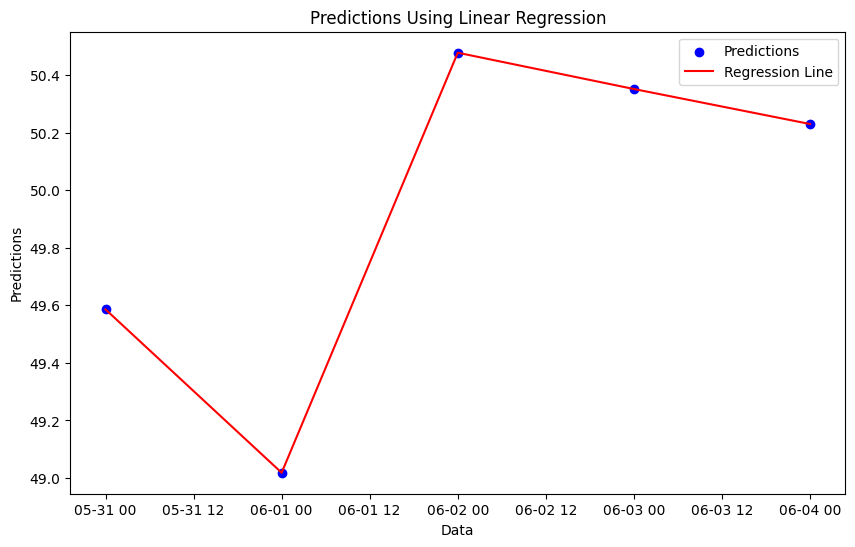

In [9]:
# GRÁFICOS
plt.figure(figsize=(10, 6)) # indica o tamanho da figura
plt.scatter(result_df['Data'], result_df['future_predictions '],
        color = 'blue', label = 'Predictions') # plot dos dados reais
plt.plot(result_df['Data'], result_df['future_predictions '], color='red',
        label = 'Regression Line') # linha de regressão
# Personalização do gráfico
plt.xlabel('Data')
plt.ylabel('Predictions')
plt.title('Predictions Using Linear Regression')
plt.legend()
plt.show() # exibe o gráfico


In [10]:
# Os gráficos mostraos pontos de dados reais (pontos azuis) e a linha de regressão
# (linha vermelha)
# Se a linha de regressão estiver próxima aos pontos reais, isso indica que seu 
# modelo está fazendo boas previsões
# X_lately = gera previsões futuras
# score(coeficiente de determinação) do modelo do teste


In [11]:
# Alta das Ações (High):
#Usar o preço mais alto do dia (alta) pode ser relevante, pois reflete o otimismo dos investidores e pode indicar tendências de crescimento.
#No entanto, a alta também pode ser volátil e influenciada por eventos específicos, como notícias ou anúncios.
#Abertura das Ações (Open):
#O preço de abertura é o primeiro valor negociado no dia e pode fornecer informações sobre o sentimento inicial do mercado.
#Pode ser útil para capturar mudanças imediatas, mas também pode ser afetado por gaps de abertura.
#Fechamento das Ações (Close):
#O preço de fechamento é amplamente utilizado em análises técnicas e gráficos.
#Ele representa o valor final negociado no dia e pode ser mais estável e representativo da tendência geral.
#Queda das Ações (Low):
#O preço mais baixo do dia (queda) pode indicar momentos de pessimismo ou pressão de venda.
#Pode ser relevante para identificar suportes ou níveis de resistência.
